<a href="https://colab.research.google.com/github/SarahGraceMaclean/Ramp-Technical-Assessment/blob/main/Ramp_Technical_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retention Analysis**

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [11]:
all_data = pd.read_csv('demo_test_data.csv')

1) Weighted Retention curve for last 180 days

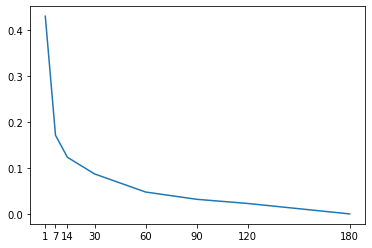

In [12]:
data_last180days = all_data.iloc[819:999,:12]    #excluded last day as it has no retention rate yet

weighted_lst = []

for i in range(8):
  i += 4
  weighted = (data_last180days.iloc[:,i] * data_last180days["DNU"]).sum(skipna = True) / data_last180days["DNU"].sum(skipna = True)
  # need to exclude DNU values from denimonator when the Dx value is Null
  weighted_lst.append(weighted)

cols = all_data.iloc[1:2,4:12].columns

col_lst = []

for i in cols:
    col_num = i.replace('D','')
    col_lst.append(int(col_num))


avg_df = pd.DataFrame({'Dx': col_lst , 'Weighted': weighted_lst})
avg_df.set_index('Dx', inplace=True)

tickvalues = avg_df.index
plt.xticks(ticks = tickvalues)
plt.plot(avg_df)
plt.show()


2) Fit Power Curve to Weighted Retention Curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


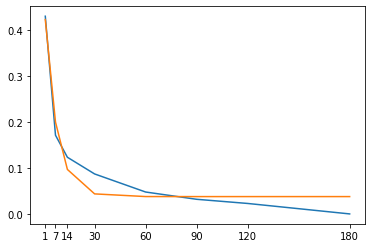

In [13]:
x = avg_df.index
y = avg_df['Weighted']
popt, pcov = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-b*t) + c,  x,  y)

a = popt[0]
b = popt[1]
c = popt[2]

plt.xticks(ticks = tickvalues)
plt.plot(avg_df)
plt.plot(x, a * np.exp(-b * x) + c)
plt.show()

3) Plot Predicted Daily Active Users against actual data

             0            1            2    ...         995         996         997
0     196.471865   172.451436   151.657343  ...   17.637088   17.637088   17.637088
1     192.821329   169.247211   148.839481  ...   17.309383   17.309383   17.309383
2     256.371121   225.027476   197.893794  ...   23.014186   23.014186   23.014186
3     234.955643   206.230231   181.363110  ...   21.091739   21.091739   21.091739
4     215.897719   189.502307   166.652230  ...   19.380928   19.380928   19.380928
..           ...          ...          ...  ...         ...         ...         ...
995  1373.101652  1205.227789  1059.902126  ...  123.261999  123.261999  123.261999
996  1716.810515  1506.915193  1325.212239  ...  154.116409  154.116409  154.116409
997  1757.714682  1542.818463  1356.786313  ...  157.788336  157.788336  157.788336
998  1443.901307  1267.371558  1114.552636  ...  129.617615  129.617615  129.617615
999  1351.567511  1186.326388  1043.279845  ...  121.328900  121.328900  121

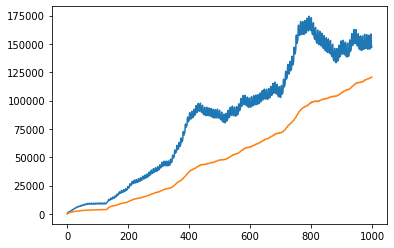

In [14]:
lst_predicted = []
lst_predicted1 = []

for i in range(len(all_data)):
  tot_new_users = all_data.iloc[i , 1]
  for ii in range(1, 999, 1):          # the curve flatens out after about 40 days and therefore no need to plot all days after this
    func = a * np.exp(-b * int(ii)) + c
    val = func * tot_new_users
    lst_predicted1.append(val)
  lst_predicted.append(lst_predicted1)
  lst_predicted1 = []

df_predicted = pd.DataFrame(lst_predicted)
print(df_predicted)

prediction = []

for i in range(len(df_predicted)):
  df = df_predicted.iloc[0:i , 0:i]
  df = np.flipud(df)
  day = np.asarray(df)
  daysum = np.trace(day)
  prediction.append(daysum)

plt.plot(all_data["DAU"])
plt.plot(prediction)
plt.show()

Observation

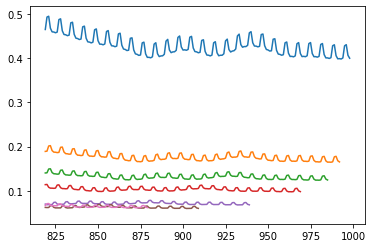

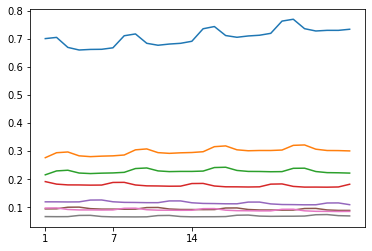

In [15]:
#Retention rate increases over weekends
retention_weekends = all_data.iloc[819:,4:12]

plt.plot(retention_weekends)
plt.show()

retention_weekends1 = all_data.iloc[1:29,4:12]

plt.xticks(ticks = tickvalues)
plt.plot(retention_weekends1)
plt.show()